# James Artuso

# Programming Exercise \#2
---

# Preamble

In [ ]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
#mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
%cd /content/drive/My\ Drive/MachineLearning


Mounted at /content/drive
/content/drive/My Drive/MachineLearning


In [ ]:
# import relevant Python libraries

import pandas as pd
import numpy as np
from scipy import stats as sps
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex

# **1. Feature Engineering for _Environmental Sensor Telemetry Data_**

## Problem 1.1

In [ ]:
df = pd.read_csv('iot_telemetry_dataset.csv')

### (a)

This is an unsupervised learning task because there is no dependent variable in the dataset.


### (b)

In [ ]:
print(f'There are {df.shape[0]} datasamples')

There are 405184 datasamples


### (c)



In [ ]:
deviceName = '00:0f:00:70:91:0a'
amount = (df['device'] == deviceName).sum()
print(f'There are {amount} devices associated with having MAC address {deviceName}')

There are 111815 devices associated with having MAC address 00:0f:00:70:91:0a



### (d)

In [ ]:
deviceName = '1c:bf:ce:15:ec:4d'
amount = (df['device'] == deviceName).sum()
print(f'There are {amount} devices associated with having MAC address {deviceName}')

There are 105918 devices associated with having MAC address 1c:bf:ce:15:ec:4d


### (e)

In [ ]:
deviceName = 'b8:27:eb:bf:9d:51'
amount = (df['device'] == deviceName).sum()
print(f'There are {amount} devices associated with having MAC address {deviceName}')

There are 187451 devices associated with having MAC address b8:27:eb:bf:9d:51


## Problem 1.2

### (a)

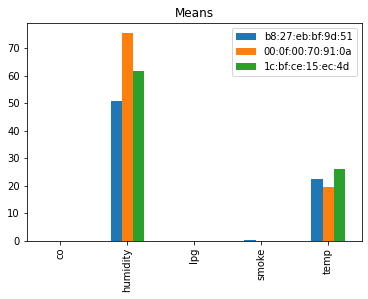

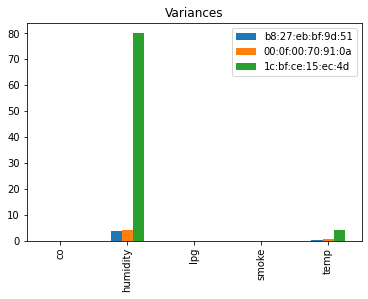

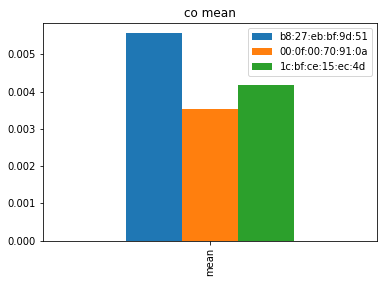

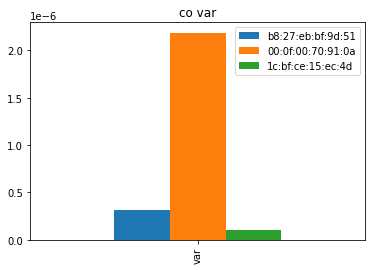

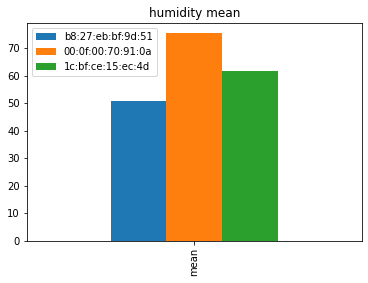

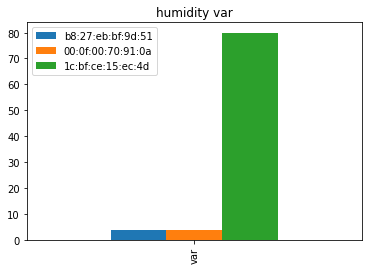

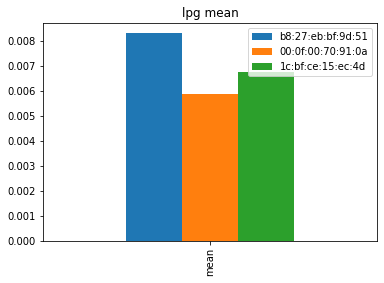

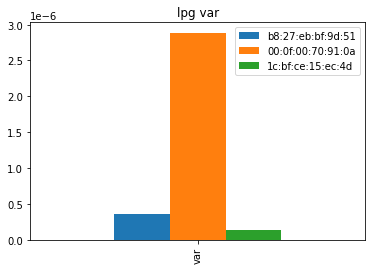

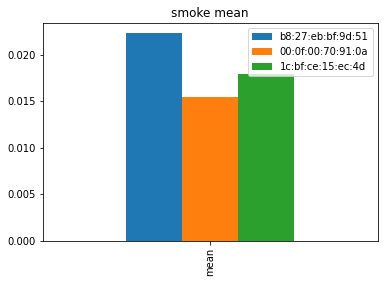

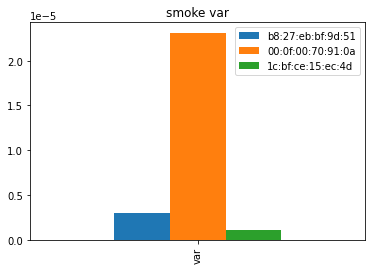

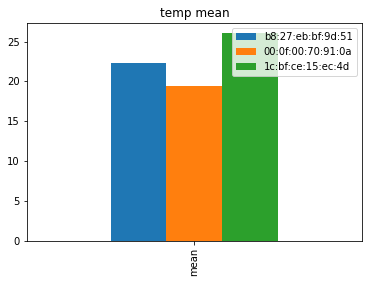

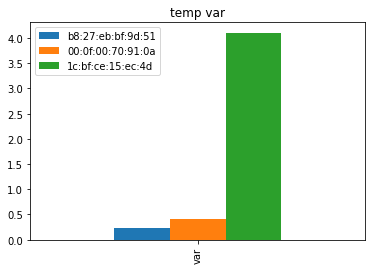

In [ ]:
devices = df['device'].unique()

aRows = df.iloc[df.index[df['device'] == devices[0]]]
bRows = df.iloc[df.index[df['device'] == devices[1]]]
cRows = df.iloc[df.index[df['device'] == devices[2]]]

categories = ['co', 'humidity', 'lpg', 'smoke', 'temp']
print

pd.concat(
   [aRows[categories].mean().rename("b8:27:eb:bf:9d:51"),
     bRows[categories].mean().rename("00:0f:00:70:91:0a"),
     cRows[categories].mean().rename("1c:bf:ce:15:ec:4d")], axis = 1).plot.bar(title = 'Means')

pd.concat(
   [aRows[categories].var().rename("b8:27:eb:bf:9d:51"),
     bRows[categories].var().rename("00:0f:00:70:91:0a"),
     cRows[categories].var().rename("1c:bf:ce:15:ec:4d")], axis = 1).plot.bar(title = 'Variances')



for s in categories:
  pd.concat([aRows[[s]].mean().rename("b8:27:eb:bf:9d:51"),
     bRows[[s]].mean().rename("00:0f:00:70:91:0a"),
     cRows[[s]].mean().rename("1c:bf:ce:15:ec:4d")],axis = 1).rename(index ={s:'mean'}).plot.bar(title = (s + " mean"))
  pd.concat([aRows[[s]].var().rename("b8:27:eb:bf:9d:51"),
     bRows[[s]].var().rename("00:0f:00:70:91:0a"),
     cRows[[s]].var().rename("1c:bf:ce:15:ec:4d")],axis = 1).rename(index ={s:'var'}).plot.bar(title = (s + " var"))



Humidity and temp have a much higher mean than the others. Humidity also has a much higher variance than the others. In addition, there is a lot a variability between devices. For example, variance for smoke for 00:0f:00:70:91:0a is much higher than the other two devices. Generally, the means stay around the same value. The variance is usually where one device will be very different from the others.



### (b)

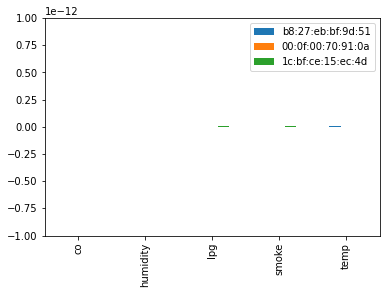

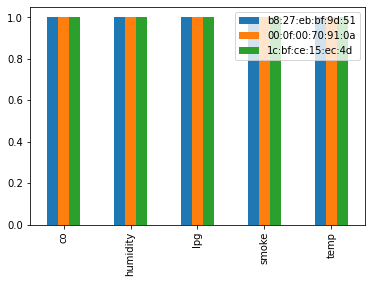

In [ ]:
devices = df['device'].unique()
dfCentered = df.copy()

dfCentered.loc[df.index[df['device'] == devices[0]], ['co', 'humidity', 'lpg', 'smoke', 'temp']] =\
  sps.zscore(df.loc[df.index[df['device'] == devices[0]], ['co', 'humidity', 'lpg', 'smoke', 'temp']])

dfCentered.loc[df.index[df['device'] == devices[1]], ['co', 'humidity', 'lpg', 'smoke', 'temp']] =\
  sps.zscore(df.loc[df.index[df['device'] == devices[1]], ['co', 'humidity', 'lpg', 'smoke', 'temp']])

dfCentered.loc[df.index[df['device'] == devices[2]], ['co', 'humidity', 'lpg', 'smoke', 'temp']] =\
  sps.zscore(df.loc[df.index[df['device'] == devices[2]], ['co', 'humidity', 'lpg', 'smoke', 'temp']])

aRows = dfCentered.iloc[df.index[df['device'] == devices[0]]]
bRows = dfCentered.iloc[df.index[df['device'] == devices[1]]]
cRows = dfCentered.iloc[df.index[df['device'] == devices[2]]]


pd.concat(
   [aRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean().rename("b8:27:eb:bf:9d:51"),
     bRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean().rename("00:0f:00:70:91:0a"),
     cRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].mean().rename("1c:bf:ce:15:ec:4d")], axis = 1).plot.bar()

pd.concat(
   [aRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].var().rename("b8:27:eb:bf:9d:51"),
     bRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].var().rename("00:0f:00:70:91:0a"),
     cRows[['co', 'humidity', 'lpg', 'smoke', 'temp']].var().rename("1c:bf:ce:15:ec:4d")], axis = 1).plot.bar()\


### (c)

In [ ]:
dfCentered = pd.get_dummies(dfCentered, columns = ['device', 'light', 'motion'])

### (d)

In [ ]:
dfCentered.head(20)

,ts,co,humidity,lpg,smoke,temp,device_00:0f:00:70:91:0a,device_1c:bf:ce:15:ec:4d,device_b8:27:eb:bf:9d:51,light_False,light_True,motion_False,motion_True
0,1.594512e+09,-1.080796,0.098428,-1.093494,-1.091262,0.871612,0,0,1,1,0,1,0
1,1.594512e+09,-0.464453,0.281223,-0.458335,-0.460394,0.524164,1,0,0,1,0,1,0
2,1.594512e+09,-1.044867,0.045488,-1.056110,-1.054139,0.664101,0,0,1,1,0,1,0
3,1.594512e+09,0.687054,1.664636,0.696251,0.694636,0.480892,0,1,0,0,1,1,0
4,1.594512e+09,-1.060347,0.045488,-1.072212,-1.070130,0.664101,0,0,1,1,0,1,0
5,1.594512e+09,0.649530,1.787613,0.659046,0.657373,0.480892,0,1,0,0,1,1,0
6,1.594512e+09,-1.044844,0.045488,-1.056086,-1.054116,0.664101,0,0,1,1,0,1,0
7,1.594512e+09,-0.398158,0.281223,-0.383563,-0.387060,0.524164,1,0,0,1,0,1,0
8,1.594512e+09,0.507422,1.787613,0.517890,0.516041,0.480892,0,1,0,0,1,1,0
9,1.594512e+09,-1.055170,0.045488,-1.066827,-1.064782,0.664101,0,0,1,1,0,1,0


### (e)

This is timestamp. Time should not be altered because then it would lose all meaning. The time can act as a psuedo indexing variable. The reason normal indexing was not used is because the space in between timestamps has meaning and can be used as an independent variable. 

## Problem 1.3

In [ ]:
ind_vars = ['co', 'humidity', 'lpg', 'smoke', 'temp']

df['mean'] = df[ind_vars].mean(axis = 1)
df['gmean'] = sps.stats.gmean(df[ind_vars], axis = 1)
df['hmean'] = sps.stats.hmean(df[ind_vars], axis = 1)
df['var'] =  df[ind_vars].var(axis = 1)
df['kurtosis'] = sps.stats.kurtosis(df[ind_vars], axis = 1)
df['skew'] = sps.stats.skew(df[ind_vars], axis = 1)
df.head(40)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:275: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


,ts,device,co,humidity,light,lpg,motion,smoke,temp,mean,gmean,hmean,var,kurtosis,skew
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,14.746604,0.245731,0.013105,507.244728,-0.725326,0.943233
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,19.144246,0.195924,0.008025,1082.894866,-0.108093,1.276663
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,14.706625,0.245914,0.013151,505.036607,-0.721394,0.945249
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,20.766012,0.260278,0.011814,1117.776178,-0.394623,1.117057
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,14.706616,0.245700,0.013131,505.036943,-0.721394,0.945249
5,1.594512e+09,1c:bf:ce:15:ec:4d,0.004391,77.900002,True,0.007009,False,0.018589,27.000000,20.985998,0.260664,0.011786,1148.837513,-0.377846,1.126135
6,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,14.706625,0.245914,0.013151,505.036606,-0.721394,0.945249
7,1.594512e+09,00:0f:00:70:91:0a,0.002938,76.000000,False,0.005241,False,0.013628,19.700001,19.144362,0.199271,0.008270,1082.889338,-0.108088,1.276666
8,1.594512e+09,1c:bf:ce:15:ec:4d,0.004345,77.900002,True,0.006957,False,0.018440,27.000000,20.985949,0.259311,0.011678,1148.840107,-0.377849,1.126134
9,1.594512e+09,b8:27:eb:bf:9d:51,0.004970,50.900000,False,0.007667,False,0.020457,22.600000,14.706619,0.245771,0.013138,505.036831,-0.721394,0.945249


# **2. Feature Learning for _Synthetically Generated Data_**

## Problem 2.1

### (a)

In [ ]:
#np.random.seed(1) #This is for testing the code
B = np.random.randn(3,2)

### (b)

In [ ]:
print(np.linalg.matrix_rank(B))

2


### (c)



In [ ]:
print("Norm of B1: {}".format(np.linalg.norm(B[:,0])))
print("Norm of B2: {}".format(np.linalg.norm(B[:,1])))
print("Inner product: {}".format(np.dot(B[:,0], B[:,1])))

Norm of B1: 1.4215127500052371
Norm of B2: 1.238285302305969
Inner product: 0.3164040307122671


### (d)

In [ ]:
print("point 1 : {}".format(np.random.randn(1)*B[:,0]+np.random.randn(1)*B[:,1]))
print("point 2 : {}".format(np.random.randn(1)*B[:,0]+np.random.randn(1)*B[:,1]))
print("point 3 : {}".format(np.random.randn(1)*B[:,0]+np.random.randn(1)*B[:,1]))

point 1 : [ 2.73579709 -1.81029647  0.83417691]
point 2 : [-0.50571426  1.52718338 -0.09549717]
point 3 : [0.52516346 2.43181654 0.2969357 ]


## Problem 2.2

### (a)

In [ ]:
v = np.random.randn(2,200)
x = np.matmul(B, v).T

### (b)

Yes, because each sample is composed of a linear combination of vectors in S. These vectors in S being B_1 and B_2.

### (c)

In [ ]:
X = x
print(X.shape)

(200, 3)


n is the number of datasamples

p is the number of features

### (d)

In [ ]:
print(f'The rank of X is {np.linalg.matrix_rank(X)}')

The rank of X is 2


## Problem 2.3

  ### (a)

In [ ]:
U, S, V = np.linalg.svd(X)

L, P = np.linalg.eig(np.matmul(X.T, X))

idx = np.flip(np.argsort(L))
L = L[idx]
P = P[:,idx]


print("Singular Vectors: \n" + str(V.T))#transposed so the singular
                                        #vectors are the columns
print("")
print("Eigenvectors: \n" + str(-1*P)) #*-1 because they are off by a factor of -1
                                      #This is ok because multiplying by -1 would 
                                      #still result in eigenvectors that form X^TX

print("\nSingular Values:")
print(np.diag(S))
print("\nEigenvalues:")
print(np.diag(L))
print("\nSingular Values squares:")
print(np.matmul(np.diag(S),np.diag(S)))


print("\nEnergy:")
print(np.matmul(S,S))

Singular Vectors: 
[[ 0.75088063 -0.57805793  0.31941715]
 [-0.62171981 -0.78185293  0.04658822]
 [ 0.22280654 -0.23357016 -0.94646829]]

Eigenvectors: 
[[ 0.75088063 -0.57805793  0.31941715]
 [-0.62171981 -0.78185293  0.04658822]
 [ 0.22280654 -0.23357016 -0.94646829]]

Singular Values:
[[2.20923543e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.61610487e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.21253251e-15]]

Eigenvalues:
[[ 4.88072119e+02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.61179495e+02  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.26253136e-14]]

Singular Values squares:
[[4.88072119e+02 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.61179495e+02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.47023510e-30]]

Energy:
749.251614695275


First, the eigenvalues need to be listed in decending order. This makes it easier to compare to the singular values. In addition, the eigenvectors are equal to the singularvectors * -1. This is ok because the eigenvectors can be multiplied by -1 to correct this. This will not change their function as eigenvectors and this can be easily proven:

eig(X^TX) = PLP^-1
In this case, P is orthonormal, so P^-1 = P^T
-> PLP^T
if the eigenvectors are multiplied by a negative, this is the same as
(-1)PL(-1)P^T
= PLP^T
So, multipling by a negative does not change anything.

When comparing the singular values squared and the eigenvalues, one can see that two of them are identical while the other is different. This is due to the rank of the matrix being 2. This means that both values should be zero, however due to rounding error in the computer, they are not.

### (b)

i) This is most likely due to a precision error within the machine. Since floating numbers are stored in binary, it is not possible to store values with 100% precision. This means there is some error associate and this manifests itself as a very small singular value.

ii) The right singular vectors of X correspond to an orthonormal basis for S.



## Problem 2.4

### (a)

2 principal components should be enough to capture all the variation in the data. This is based purly off my understanding of the data. Each datasample was contructed with a different linear combination of the same 2 random vectors. This means that each datasample lies in a 2d subspace. 2 principal components should be enough to define this subspace.

### (b)

x = B  * v
E[x] = E[B*V]
Given N(0,1) is a gaussian distirbution with mean 0 and variance 1, we know that 

B = 

N(0,1), N(0,1)

N(0,1), N(0,1)

N(0,1), N(0,1)


V = 

N(0,1)

N(0,1)

So Bv = 

N(0,1) * N(0,1) + N(0,1) * N(0,1)

N(0,1) * N(0,1) + N(0,1) * N(0,1)

N(0,1) * N(0,1) + N(0,1) * N(0,1)


And the expected value of 

N(0,1) * N(0,1) + N(0,1) * N(0,1)

is


E[N(0,1)] * E[N(0,1)] + E[N(0,1)] * E[N(0,1)]

= 0 * 0 + 0 * 0

= 0

This is due to linearity of expectation, so

E[Bv]

=

0

0

0

= E[X]


In [ ]:
print(f'Mean of x_1: {X[:,0].mean()}')
print(f'Mean of x_2: {X[:,1].mean()}')
print(f'Mean of x_3: {X[:,2].mean()}')

Mean of x_1: -0.11137369319889416
Mean of x_2: -0.04610210128610393
Mean of x_3: -0.03985604434117548


These values are small, however as the number of datasamples goes up, they would get even smaller. This is due to the law of large numbers.

### (c)

In [ ]:
u1 = V[0, :]
u2 = V[1, :]

print(f'u1 = {u1}')
print(f'u2 = {u2}')

u1 = [ 0.75088063 -0.62171981  0.22280654]
u2 = [-0.57805793 -0.78185293 -0.23357016]


### (d)

In [ ]:
U = np.array([u1, u2])

Xf = np.matmul(U,X.T)

### (e)

In [ ]:
X_hat = np.matmul(U.T, Xf).T

### (f)

In [ ]:
error = X_hat-x

print(f'Error: {np.sum(np.square(np.linalg.norm(error, axis = 1)))}')

Error: 7.685076568800269e-29


### (g)

In [ ]:
Xf2 = np.matmul(u1,X.T)

### (h)

In [ ]:
X_hat2 = np.outer(u1, Xf2).T

### (i)

In [ ]:
error2 = X_hat2-x

print(f'Error: {np.sum(np.square(np.linalg.norm(error2, axis = 1)))}')
print("")
print(f'Singular value 2 squared: {S[1]**2}')

Error: 261.17949539636453

Singular value 2 squared: 261.1794953963646


### (j)

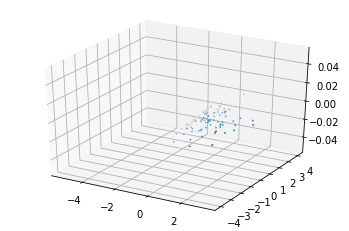

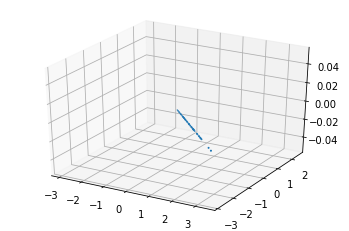

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(X[:,0], X[:,1], X[:,2])


fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection = '3d')
plt.scatter(X_hat2[:,0], X_hat2[:,1], X_hat2[:,2])

The bottom plot is a line because it was constructed using only u1. This means the subspace that the data is projected on is a 1 dimensional subspace. This is the line that is formed. 
